In [25]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
from pathlib import Path

__file__ = ""

In [26]:
class CFG:
    wandb_mode = "disabled"
    exp_name = Path(__file__).stem

    seed = 42
    epochs = 30
    img_size = 384
    n_fold = 6

    pipeline = "aux"
    preprocess = "extended_negative_sampling"
    dataset = "base_equal_sampling"
    auxtargets = [
        # "sex",
        # "age_approx",
        # "anatom_site_general",
    ]
    model_name: str = "aux"
    encoder_name: str = "tf_efficientnet_b0_ns"

    image_dir = "/kaggle/input/improved_dataset/train_image"
    meta_path = "/kaggle/input/improved_dataset/metadata.csv"

    train_batch_size = 32
    valid_batch_size = 64
    learning_rate = 1e-4

    lossfn = "BCEWithLogitsLoss"
    sampling_factor = 20
    loss_weight = 1
    optimizer = "AdamW"
    scheduler = "CosineAnnealingLR"

    min_lr = 1e-7
    weight_decay = 1e-6

    train_transform = A.Compose(
        [
            A.Resize(img_size, img_size),
            A.RandomRotate90(p=0.5),
            A.Flip(p=0.5),
            A.Downscale(p=0.25),
            A.ShiftScaleRotate(
                shift_limit=0.1, scale_limit=0.15, rotate_limit=60, p=0.5
            ),
            A.HueSaturationValue(
                hue_shift_limit=0.2, sat_shift_limit=0.2, val_shift_limit=0.2, p=0.5
            ),
            A.RandomBrightnessContrast(
                brightness_limit=(-0.1, 0.1), contrast_limit=(-0.1, 0.1), p=0.5
            ),
            A.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
                max_pixel_value=255.0,
                p=1.0,
            ),
            ToTensorV2(),
        ],
        p=1.0,
    )

    valid_transform = A.Compose(
        [
            A.Resize(img_size, img_size),
            A.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
                max_pixel_value=255.0,
                p=1.0,
            ),
            ToTensorV2(),
        ],
        p=1.0,
    )

In [28]:
from src.dataset import get_train_dataloader
from src.preprocess import get_train_preprocess

df = get_train_preprocess(CFG)(CFG)
train_dataloader, valid_dataloader = get_train_dataloader(df, 0, CFG)

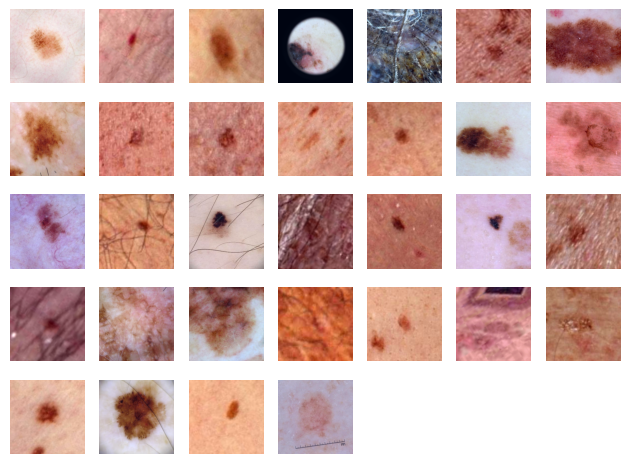

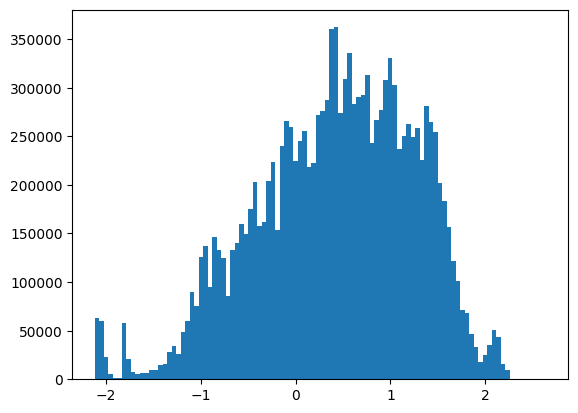

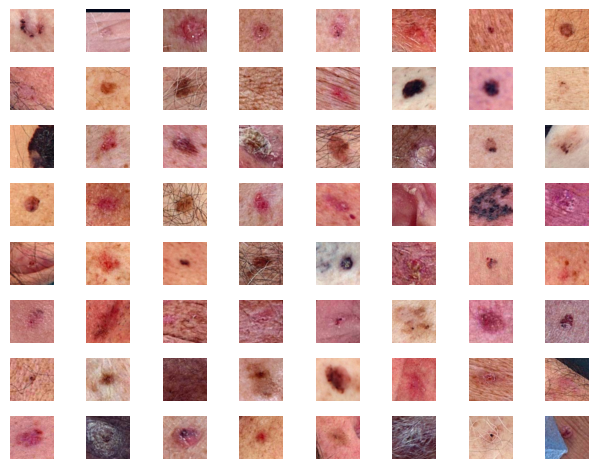

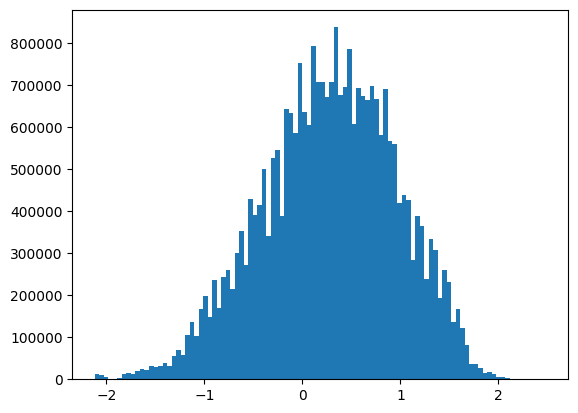

In [35]:
import torchshow
import matplotlib.pyplot as plt

for i in train_dataloader:
    # print(i)
    torchshow.show(
        i["image"],
    )
    plt.figure()
    plt.hist(i["image"].flatten(), bins=100)
    break

for i in valid_dataloader:
    # print(i)
    torchshow.show(
        i["image"],
    )
    plt.figure()
    plt.hist(i["image"].flatten(), bins=100)
    break